<a href="https://colab.research.google.com/github/Roger90Br/regression-model-marketing/blob/main/Desafio_4_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Substitua 'MKT.csv' pelo nome do seu arquivo CSV, se ele estiver em um diretório diferente, inclua o caminho
caminho_arquivo = 'MKT.csv'

# Carregar o arquivo CSV em um DataFrame do pandas
dados = pd.read_csv(caminho_arquivo)

# Agora você pode começar a analisar seus dados usando o DataFrame 'dados'

In [ ]:
# Definir a largura máxima de exibição
pd.options.display.width = 0

# Descrever os dados e arredondar para 2 casas decimais
descricao_dados = dados.describe().round(2)

# Transpor o DataFrame
descricao_dados = descricao_dados.T

# Adicionar unidades e títulos explicativos
descricao_dados.index.name = 'Variável'
descricao_dados.columns = ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '1º Quartil', 'Mediana', '3º Quartil', 'Máximo']

# Exibir a descrição dos dados como uma string
print(descricao_dados.to_string())


           Contagem   Média  Desvio Padrão  Mínimo  1º Quartil  Mediana  3º Quartil  Máximo
Variável                                                                                   
youtube       171.0  178.02         102.45    0.84       91.08   179.76      262.98  355.68
facebook      171.0   27.67          17.91    0.00       11.70    26.76       43.68   59.52
newspaper     171.0   35.24          24.90    0.36       13.74    31.08       50.88  121.08
sales         171.0   16.92           6.31    1.92       12.54    15.48       20.82   32.40


In [ ]:
dados.describe().round(2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


Análise de Investimentos e Vendas

Este conjunto de dados representa uma análise de investimentos em diferentes plataformas de marketing, como YouTube, Facebook e jornais, em relação às vendas resultantes. Cada linha representa uma observação única, com quatro colunas distintas:

YouTube: O investimento em publicidade feito na plataforma do YouTube. Este valor representa a quantia gasta em campanhas de marketing específicas na plataforma de vídeo online.

Facebook: O investimento em publicidade realizado na plataforma do Facebook. Esse valor indica o montante destinado a campanhas publicitárias direcionadas aos usuários da rede social.

Newspaper: O investimento em publicidade em jornais ou mídia impressa. Essa coluna reflete os gastos com anúncios em jornais impressos, revistas ou outras formas de mídia impressa.

Sales: As vendas resultantes das campanhas de marketing e publicidade. Este é o resultado final da estratégia de investimento, representando as vendas realizadas como consequência das campanhas de marketing realizadas nas plataformas mencionadas.

A análise desses dados pode revelar insights valiosos sobre a eficácia das diferentes plataformas de marketing em gerar vendas, ajudando a informar decisões futuras de alocação de recursos e estratégias de publicidade.

In [ ]:
print(dados.head())

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88


In [ ]:
# Verificar o tipo de dado de cada coluna e se há valores nulos
print(dados.info())

# Verificar se há valores nulos em cada coluna
print(dados.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None
youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64


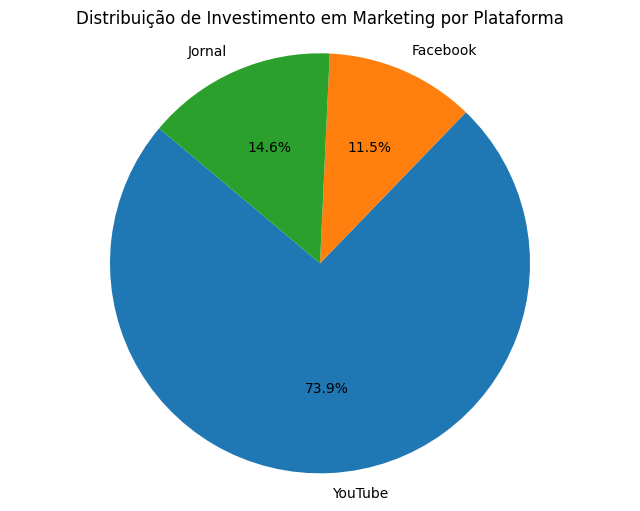

In [ ]:
import matplotlib.pyplot as plt

# Calcule a soma dos investimentos no YouTube
investimento_youtube = dados['youtube'].sum()

# Calcule a soma dos investimentos no Facebook
investimento_facebook = dados['facebook'].sum()

# Calcule a soma dos investimentos em jornais
investimento_jornal = dados['newspaper'].sum()

# Lista de rótulos e valores para o gráfico de pizza
plataformas = ['YouTube', 'Facebook', 'Jornal']
valores = [investimento_youtube, investimento_facebook, investimento_jornal]

# Crie o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=plataformas, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Investimento em Marketing por Plataforma')
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.show()


Matriz de Correlação:

A matriz de correlação é uma ferramenta estatística que calcula a relação linear entre pares de variáveis em um conjunto de dados. Ela fornece um valor numérico que indica a direção e a força dessa relação. Os valores variam entre -1 e 1, onde:

Um valor próximo de 1 indica uma correlação positiva forte, o que significa que as variáveis tendem a aumentar ou diminuir juntas.
Um valor próximo de -1 indica uma correlação negativa forte, o que significa que as variáveis tendem a mudar em direções opostas.
Um valor próximo de 0 indica uma correlação fraca ou nula, onde as variáveis não têm uma relação linear clara.
O mapa de calor é uma forma visual de representar a matriz de correlação, onde cores diferentes são usadas para destacar diferentes níveis de correlação.

Gráfico de Dispersão:

Um gráfico de dispersão é uma representação visual da relação entre duas variáveis em um conjunto de dados. Ele mostra pontos no plano cartesiano, onde cada ponto representa uma observação do conjunto de dados. A posição de cada ponto no gráfico mostra os valores das duas variáveis para essa observação.

Ao plotar um gráfico de dispersão para uma variável em relação a outra, podemos observar a forma geral da relação entre essas variáveis. Se houver uma relação linear entre as variáveis, os pontos tenderão a seguir uma tendência específica no gráfico. Se não houver uma relação linear clara, os pontos serão distribuídos de forma mais aleatória.

Os gráficos de dispersão são úteis para identificar padrões, tendências e possíveis correlações entre variáveis em um conjunto de dados, complementando a análise quantitativa fornecida pela matriz de correlação.

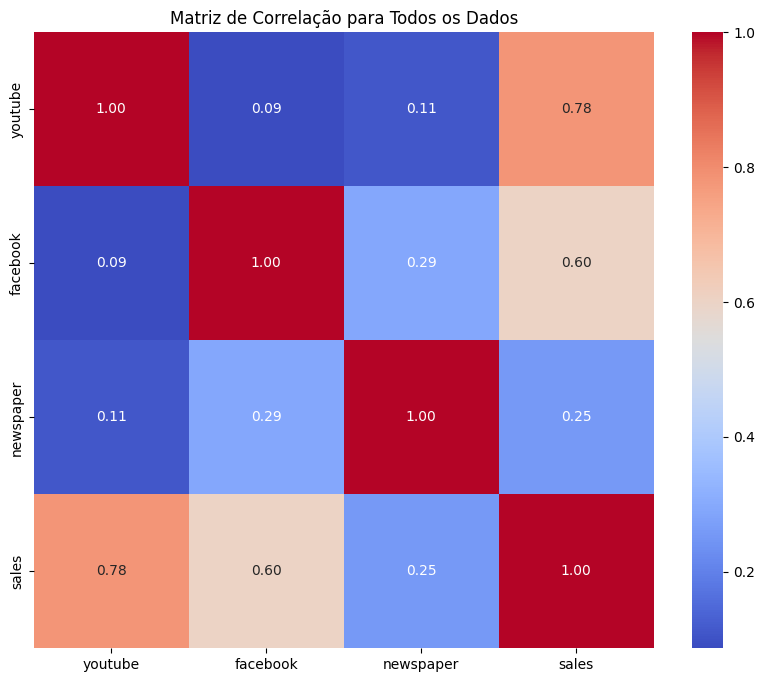

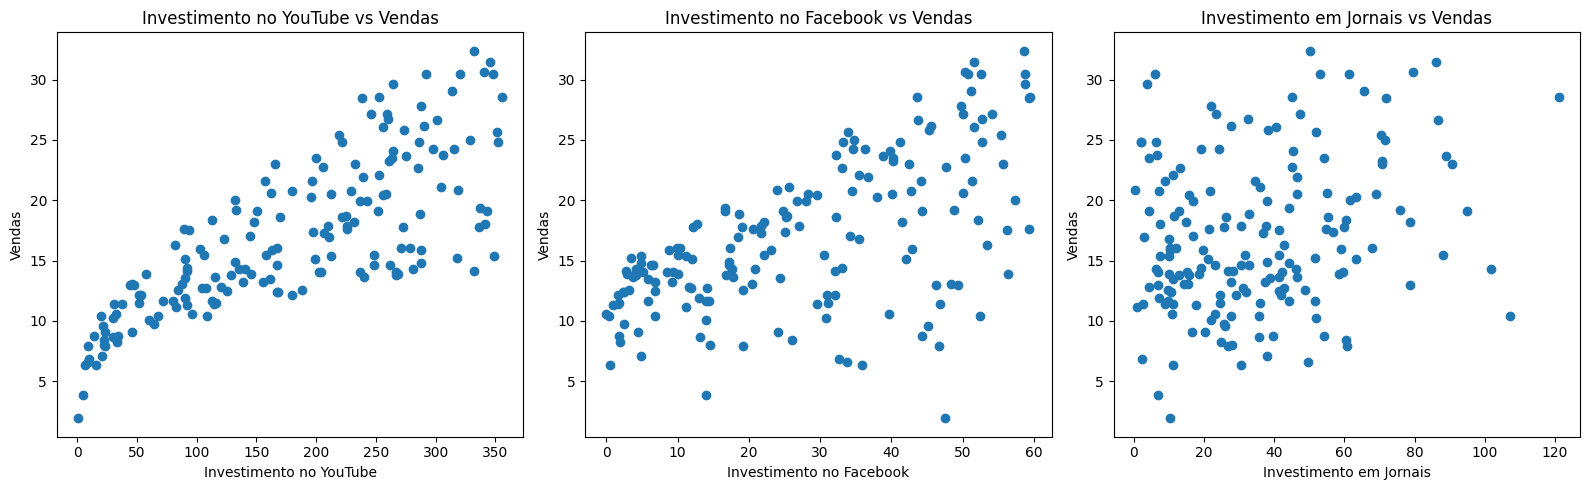

In [ ]:
import seaborn as sns

# Calcular a matriz de correlação para todos os dados
correlacao_total = dados.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_total, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação para Todos os Dados')
plt.show()

# Plotar gráficos de dispersão para cada plataforma versus vendas
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.scatter(dados['youtube'], dados['sales'])
plt.xlabel('Investimento no YouTube')
plt.ylabel('Vendas')
plt.title('Investimento no YouTube vs Vendas')

plt.subplot(1, 3, 2)
plt.scatter(dados['facebook'], dados['sales'])
plt.xlabel('Investimento no Facebook')
plt.ylabel('Vendas')
plt.title('Investimento no Facebook vs Vendas')

plt.subplot(1, 3, 3)
plt.scatter(dados['newspaper'], dados['sales'])
plt.xlabel('Investimento em Jornais')
plt.ylabel('Vendas')
plt.title('Investimento em Jornais vs Vendas')

plt.tight_layout()
plt.show()


Análise da Relação entre Investimentos e Vendas

Durante a análise dos dados, foi identificada uma relação significativa entre os investimentos em diferentes plataformas de marketing e as vendas resultantes. A matriz de correlação revelou que o investimento no YouTube apresentou uma forte correlação positiva com as vendas, com um coeficiente de correlação de 0,78. Da mesma forma, o investimento no Facebook também demonstrou uma correlação positiva com as vendas, embora ligeiramente mais fraca, com um coeficiente de correlação de 0,60.

Ao examinar os gráficos de dispersão, observou-se uma tendência mais linear no relacionamento entre as vendas e o investimento no YouTube em comparação com o investimento no Facebook e jornais. O gráfico de dispersão das vendas em relação ao investimento no YouTube exibiu uma distribuição mais linear dos pontos, sugerindo uma relação mais direta e consistente entre os investimentos nessa plataforma e as vendas. Embora o gráfico de dispersão para o investimento no Facebook também tenha mostrado alguma linearidade, foi observada uma dispersão maior dos pontos em comparação com o investimento no YouTube, indicando uma relação menos definida entre os investimentos no Facebook e as vendas.

Portanto, apesar de uma correlação positiva entre os investimentos em diferentes plataformas e as vendas, o investimento no YouTube parece ter uma relação mais forte e linear com as vendas em comparação com o investimento no Facebook e jornais.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar os dados em features (investimentos) e target (vendas)
X = dados[['youtube', 'facebook', 'newspaper']]
y = dados['sales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo_regressao = LinearRegression()

# Treinar o modelo com os dados de treinamento
modelo_regressao.fit(X_train, y_train)

# Fazer previsões com base nos dados de teste
y_pred = modelo_regressao.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Mean Squared Error): {mse}')
print(f'R^2 (Coefficient of Determination): {r2}')


MSE (Mean Squared Error): 5.576790234026713
R^2 (Coefficient of Determination): 0.872863085701216


Criação de um Modelo de Regressão Linear para Previsão de Vendas

O objetivo deste código é criar um modelo de regressão linear simples para prever as vendas com base nos investimentos em diferentes plataformas de marketing (YouTube, Facebook e jornais). O modelo de regressão linear é uma técnica de aprendizado de máquina que assume uma relação linear entre as variáveis independentes (investimentos) e a variável dependente (vendas), permitindo fazer previsões com base nessa relação.

Divisão dos Dados:
O conjunto de dados é dividido em duas partes: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos.

Criação do Modelo de Regressão Linear:
Um modelo de regressão linear é criado usando a classe LinearRegression da biblioteca scikit-learn. Este modelo é inicializado sem nenhum parâmetro específico, o que significa que ele será ajustado aos dados usando os valores padrão.

Treinamento do Modelo:
O modelo de regressão linear é treinado com os dados de treinamento, ou seja, os investimentos em diferentes plataformas (YouTube, Facebook e jornais) são usados como features (variáveis independentes), enquanto as vendas são o target (variável dependente). O modelo aprende a relação entre os investimentos e as vendas durante esta etapa.

Previsões:
O modelo treinado é usado para fazer previsões com base nos dados de teste. Isso permite avaliar como o modelo se sai ao prever as vendas com base nos investimentos, utilizando dados que não foram vistos durante o treinamento.

Avaliação do Desempenho do Modelo:
O desempenho do modelo é avaliado usando duas métricas comuns:

Erro Quadrático Médio (MSE): O MSE mede a média dos quadrados dos erros entre as previsões do modelo e os valores reais. Quanto menor o MSE, melhor o desempenho do modelo.
Coeficiente de Determinação (R^2): O R^2 é uma medida da proporção da variabilidade na variável dependente que é explicada pelo modelo. Ele varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados. Quanto mais próximo de 1, melhor o desempenho do modelo.
Essas métricas são úteis para avaliar a precisão e a eficácia do modelo na previsão das vendas com base nos investimentos em diferentes plataformas de marketing.

In [ ]:
import pandas as pd

# Definir os diferentes valores de investimento
valores_investimento = [0, 50, 100, 150, 200, 250, 300, 350, 400]

# Lista para armazenar os dados dos cenários
dados_cenarios = []

# Gerar os cenários para cada combinação de valores de investimento
for youtube in valores_investimento:
    for facebook in valores_investimento:
        for newspaper in valores_investimento:
            dados_cenarios.append({'youtube': youtube, 'facebook': facebook, 'newspaper': newspaper})

# Criar DataFrame com os dados dos cenários
cenarios = pd.DataFrame(dados_cenarios)

# Exibir os primeiros registros do DataFrame
print(cenarios.head())


   youtube  facebook  newspaper
0        0         0          0
1        0         0         50
2        0         0        100
3        0         0        150
4        0         0        200


   youtube  facebook  newspaper  Previsao_Vendas
0        0         0          0         3.703050
1        0         0         50         3.700608
2        0         0        100         3.698166
3        0         0        150         3.695725
4        0         0        200         3.693283


In [ ]:
# Descobrir o número de linhas na tabela de cenários
numero_linhas = cenarios.shape[0]

print("Número de linhas na tabela de cenários:", numero_linhas)


Número de linhas na tabela de cenários: 729


In [ ]:
# Ordenar o DataFrame com base nas previsões de vendas em ordem decrescente
cenarios_ranked = cenarios.sort_values(by='Previsao_Vendas', ascending=False)

# Selecionar os top 10 resultados ranqueados
top_10_resultados = cenarios_ranked.head(10)

# Exibir os top 10 resultados ranqueados
print(top_10_resultados)

     youtube  facebook  newspaper  Previsao_Vendas
720      400       400          0        99.170176
721      400       400         50        99.167735
722      400       400        100        99.165293
723      400       400        150        99.162851
724      400       400        200        99.160409
725      400       400        250        99.157968
726      400       400        300        99.155526
727      400       400        350        99.153084
728      400       400        400        99.150643
639      350       400          0        96.960884


In [ ]:
import numpy as np

# Definir os valores de investimento apenas para o YouTube variando de 50 em 50 até 400
investimentos_youtube = np.arange(0, 401, 50)

# Criar uma lista para armazenar os dados dos cenários
dados_cenarios_youtube = []

# Gerar os cenários com investimento apenas no YouTube
for youtube in investimentos_youtube:
    dados_cenarios_youtube.append({'youtube': youtube, 'facebook': 0, 'newspaper': 0})

# Criar DataFrame com os dados dos cenários
cenarios_youtube = pd.DataFrame(dados_cenarios_youtube)

# Fazer previsões para os cenários com investimento apenas no YouTube
previsoes_youtube = modelo_regressao.predict(cenarios_youtube)

# Adicionar as previsões ao DataFrame de cenários do YouTube
cenarios_youtube['Previsao_Vendas'] = previsoes_youtube

# Exibir os primeiros registros do DataFrame com as previsões
print(cenarios_youtube)


   youtube  facebook  newspaper  Previsao_Vendas
0        0         0          0         3.703050
1       50         0          0         5.912342
2      100         0          0         8.121634
3      150         0          0        10.330926
4      200         0          0        12.540218
5      250         0          0        14.749510
6      300         0          0        16.958802
7      350         0          0        19.168094
8      400         0          0        21.377386


In [ ]:
import numpy as np

# Definir os valores de investimento apenas para o Facebook variando de 50 em 50 até 400
investimentos_facebook = np.arange(0, 401, 50)

# Criar uma lista para armazenar os dados dos cenários
dados_cenarios_facebook = []

# Gerar os cenários com investimento apenas no Facebook
for facebook in investimentos_facebook:
    dados_cenarios_facebook.append({'youtube': 0, 'facebook': facebook, 'newspaper': 0})

# Criar DataFrame com os dados dos cenários
cenarios_facebook = pd.DataFrame(dados_cenarios_facebook)

# Fazer previsões para os cenários com investimento apenas no Facebook
previsoes_facebook = modelo_regressao.predict(cenarios_facebook)

# Adicionar as previsões ao DataFrame de cenários do Facebook
cenarios_facebook['Previsao_Vendas'] = previsoes_facebook

# Exibir os primeiros registros do DataFrame com as previsões
print(cenarios_facebook)


   youtube  facebook  newspaper  Previsao_Vendas
0        0         0          0         3.703050
1        0        50          0        13.427149
2        0       100          0        23.151247
3        0       150          0        32.875346
4        0       200          0        42.599445
5        0       250          0        52.323544
6        0       300          0        62.047642
7        0       350          0        71.771741
8        0       400          0        81.495840



**Investimento em Publicidade: Estratégia Eficiente no Facebook**

Os dados analisados revelam uma descoberta intrigante no mundo da publicidade digital: embora o YouTube demonstre uma forte correlação com as vendas, investir em publicidade no Facebook pode resultar em um retorno ainda mais substancial.

Ao comparar as previsões de vendas geradas para investimentos exclusivos no YouTube e no Facebook, percebemos que, apesar do YouTube apresentar uma correlação sólida com as vendas, os investimentos no Facebook tendem a gerar retornos mais expressivos.

Essa constatação sublinha a importância de uma abordagem diversificada ao planejar estratégias de publicidade online. Embora o YouTube possa oferecer vantagens em termos de alcance e engajamento, o Facebook demonstra sua eficácia ao direcionar investimentos publicitários, gerando um retorno mais significativo sobre o investimento.

Portanto, ao formular estratégias de publicidade digital, é fundamental considerar não apenas a correlação entre os canais de publicidade e as vendas, mas também o potencial de retorno sobre o investimento em cada plataforma. Ao equilibrar o alcance, o engajamento e a eficácia dos investimentos publicitários, as empresas podem maximizar o impacto de suas campanhas e impulsionar o crescimento dos negócios de forma eficiente e eficaz.

Em resumo, os dados sugerem que uma abordagem estratégica que priorize investimentos publicitários no Facebook pode oferecer um caminho mais lucrativo para o sucesso das campanhas de marketing digital.